<a href="https://colab.research.google.com/github/Subashcoder/deep-learning/blob/master/fashiohmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
!pip install -q tensorflow_datasets

In [0]:
import tensorflow as tf
import logging
tf.get_logger()
import tensorflow_datasets as tfd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
import math

In [15]:
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

2.2.0-rc2


In [0]:
from __future__ import absolute_import,division,print_function

In [17]:
dataset,metasets=tfd.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompletePNVRXO/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompletePNVRXO/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
class_name=['t-shirt','trouser','pullover','dress','coat','shandel','shirt','sneaker','boot','ankel boot']

In [19]:
num_train_examples=metasets.splits['train'].num_examples
num_test_examples=metasets.splits['test'].num_examples
print(num_train_examples)

60000


In [0]:
def normalize(images, labels):
  images=tf.cast(images,float32)
  images /= 255
  return images,labels

  train_dataset=train_dataset.map(normalize)
  test_dataset=test_dataset.map(normalize)

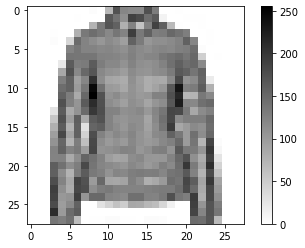

In [21]:
for images, labels in test_dataset.take(1):
  break

images=images.numpy().reshape((28,28))
plt.figure()
plt.imshow(images,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

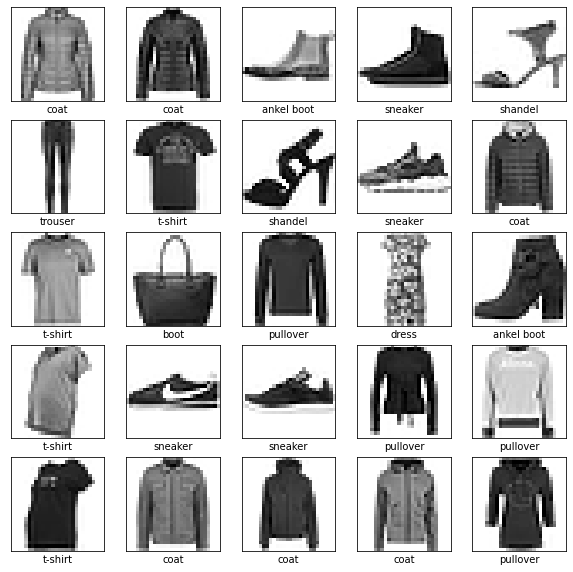

In [22]:
plt.figure(figsize=(10,10))
i=0
for images,labels in test_dataset.take(25):
  images=images.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images,cmap=plt.cm.binary)
  plt.grid(False)
  plt.xlabel(class_name[labels])
  i += 1


plt.show()


In [0]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=[28,28,1]),
                          tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.relu)]
                          )

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
batch_size=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset=test_dataset.batch(batch_size)

In [26]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 14.2355 - accuracy: 0.1064
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 14.4833 - accuracy: 0.1015
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 14.5134 - accuracy: 0.0996
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 14.4995 - accuracy: 0.1005
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 14.5173 - accuracy: 0.0993


In [27]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print(test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 14.5060 - accuracy: 0.1000
0.10000000149011612


In [0]:
for test_image,test_label in test_dataset.take(1):
  test_image=test_image.numpy()
  test_label=test_label.numpy()
  predict=model.predict(test_image)

In [30]:
predict.shape
np.argmax(predict[0])

8

In [31]:
test_label[0]

4